## DAY2課題

DAY2で学んだことの取り組み<br>
 ・DAY2で学んだアルゴリズムを利用してモデルをつくり、DAY1宿題提出時の精度と比較する<br>
 ・クロスバリデーションによるパラメータチューニングを行う<br>
 ・CV済のモデルによって、精度および結果の評価を行う<br>
 ・その他、精度の向上ができるような処理に取り組み、精度を上げる<br>

### DAY1の結果
Accuracy : 0.9846153846153847<br>
  
| 　          | precision | recall | f1-score | support |
| ----------- | --------- | ------ | -------- | ------- |
|0            |0.97       |1.00    |0.99      |843      |
|1            |1.00       |0.97    |0.98      |782      |
|avg / total  |0.99       |0.98    |0.98      |1625     |


In [74]:
#使用するライブラリのインポート
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import seaborn as sns
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO
#データセットの読み込み
df_data = pd.read_csv("mushrooms.csv")

#パラメータの選定も省略
#異常値、欠測値の確認は省略
#？の置換
df_data = df_data.replace('?', 'n')
#データの削除
df_data = df_data.drop(['veil-type'], axis = 1)

#使用しないデータ項目を削除
df_tree = df_data.drop(['cap-shape', 'cap-surface', 'cap-color', 'bruises','gill-attachment', 'gill-spacing', 
                       'gill-size', 'gill-color','stalk-shape', 'stalk-root', 'stalk-surface-above-ring','stalk-surface-below-ring', 
                       'stalk-color-above-ring','stalk-color-below-ring', 'veil-color', 'ring-number','ring-type', 'population', 
                       'habitat'], axis=1)

#ダミー変数の作成
df_dummy = pd.get_dummies(df_tree[df_tree.columns]) 

#毒キノコであることを目的変数
y = df_dummy.class_p
#それ以外を説明変数
X = df_dummy.drop(['class_p','class_e'], axis=1)

#
print(X.columns)
#学習データとテストデータを分割する
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)


Index(['odor_a', 'odor_c', 'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p',
       'odor_s', 'odor_y', 'spore-print-color_b', 'spore-print-color_h',
       'spore-print-color_k', 'spore-print-color_n', 'spore-print-color_o',
       'spore-print-color_r', 'spore-print-color_u', 'spore-print-color_w',
       'spore-print-color_y'],
      dtype='object')


### 決定木
説明変数 : odor、spore-print-color<br>
目的変数 : class

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

score= 0.9943068164332974


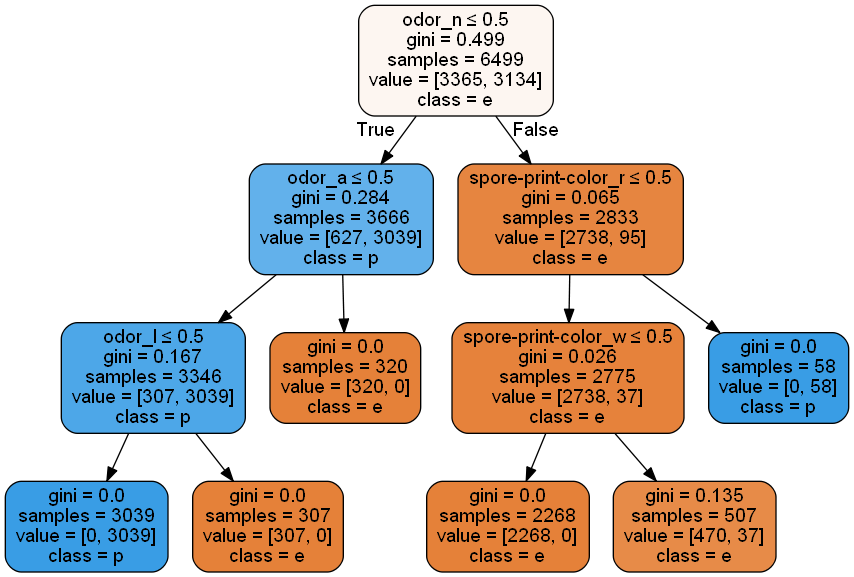

In [45]:
clf_dt = DecisionTreeClassifier(criterion="gini", max_depth=None, min_samples_leaf=3, random_state=1234)
clf_dt = clf_dt.fit(X_train, y_train)

#学習データによる評価
print(clf_dt)
print()
print("score=", clf_dt.score(X_train, y_train))

# 決定木の描画
dot_data = StringIO() #dotファイル情報の格納先
export_graphviz(clf_dt, out_file=dot_data,  
                     feature_names=X_train.columns,  
                     class_names=["e","p"],  
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())


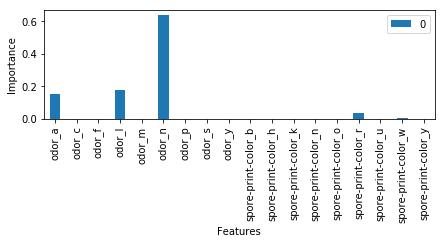

In [46]:
pd.DataFrame(clf_dt.feature_importances_, index=X_train.columns).plot.bar(figsize=(7,2))
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

In [47]:
#テストデータで評価
y_pred_dt = clf_dt.predict(X_test)

#評価結果の表示
print("Accuracy :", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Accuracy : 0.9932307692307693
             precision    recall  f1-score   support

          0       0.99      1.00      0.99       843
          1       1.00      0.99      0.99       782

avg / total       0.99      0.99      0.99      1625



### ランダムフォレスト
ランダムフォレストの適用<br>
説明変数 : odor、spore-print-color<br>
目的変数 : class

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)

score= 0.9429142945068472
0


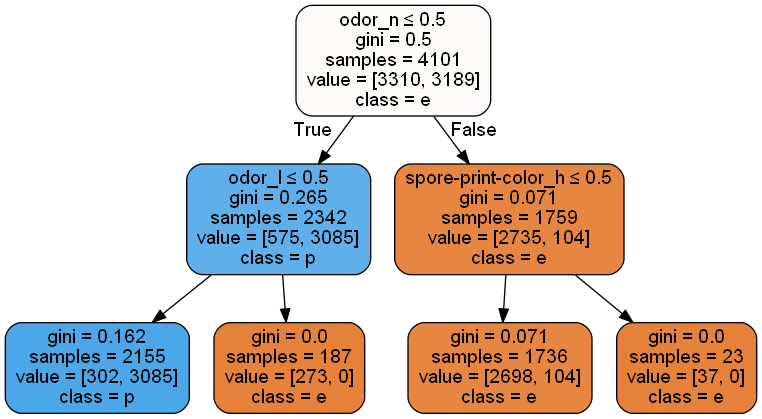

1


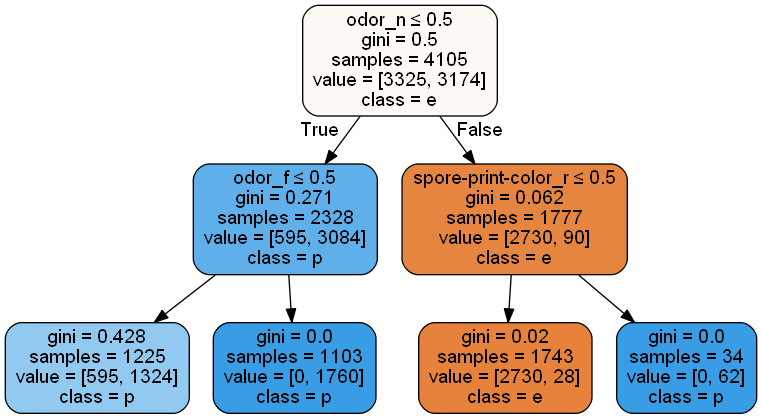

2


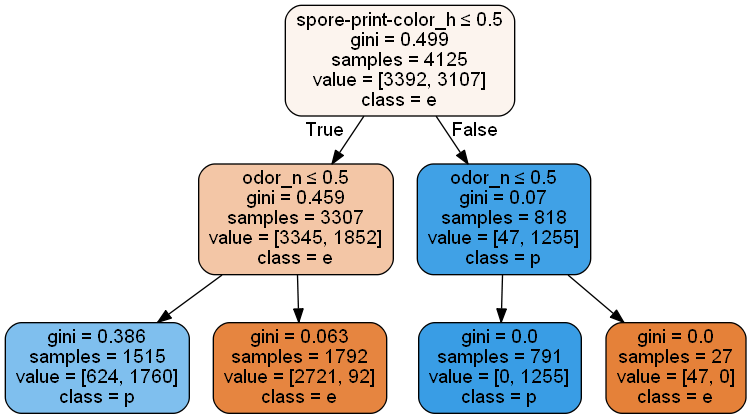

3


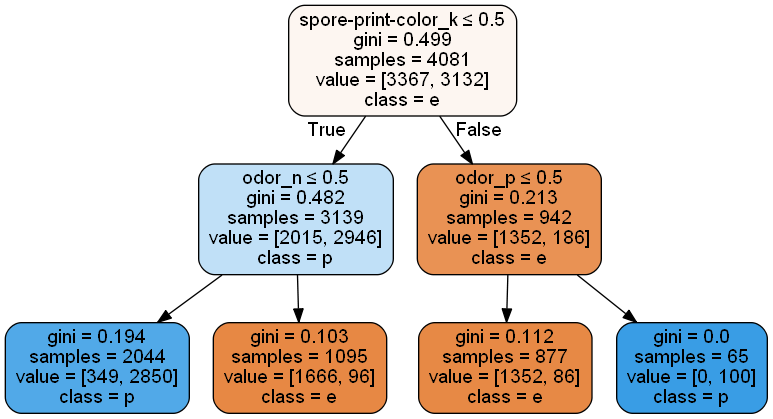

4


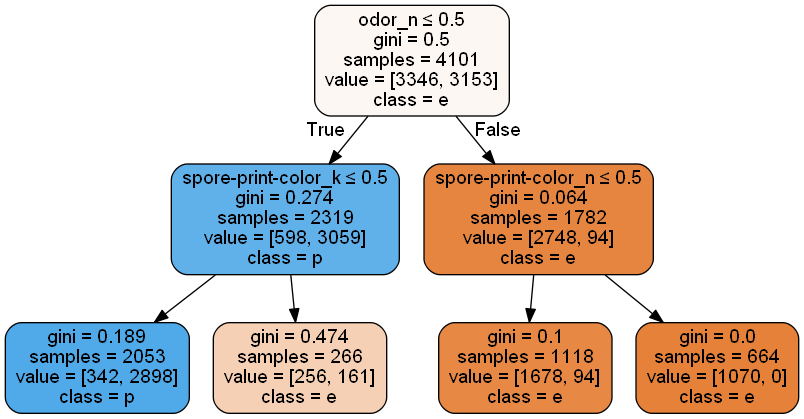

5


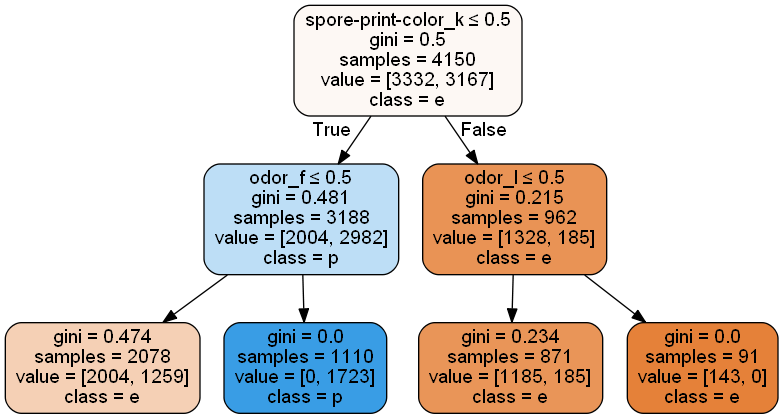

6


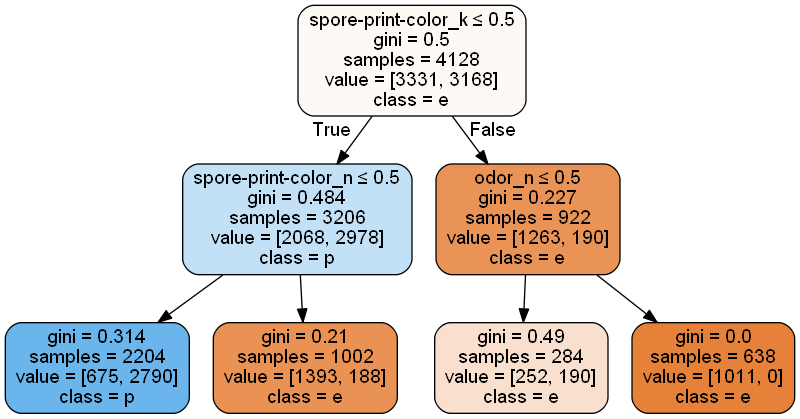

7


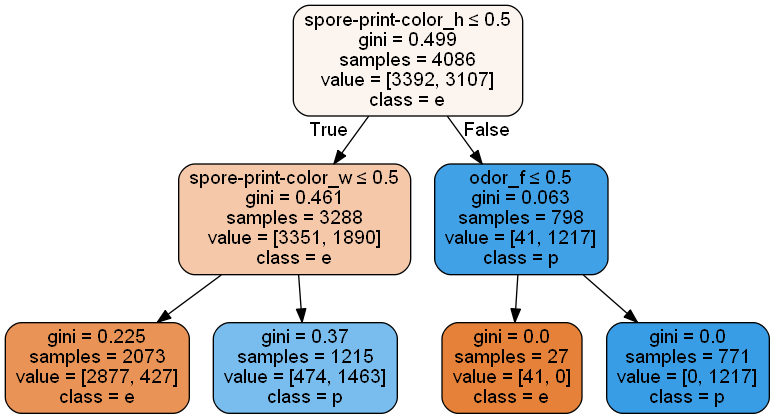

8


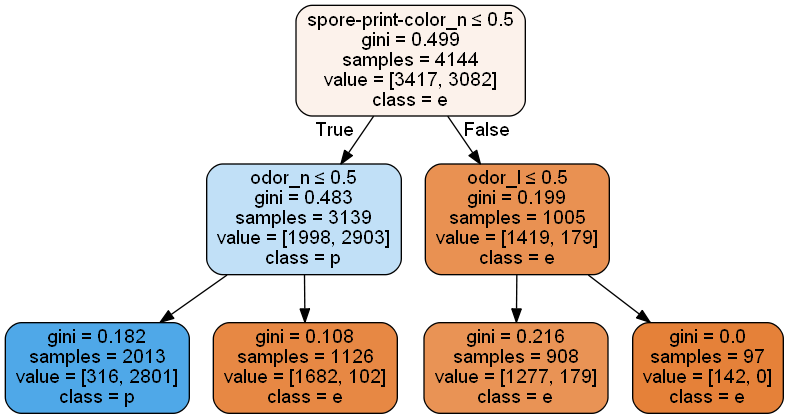

9


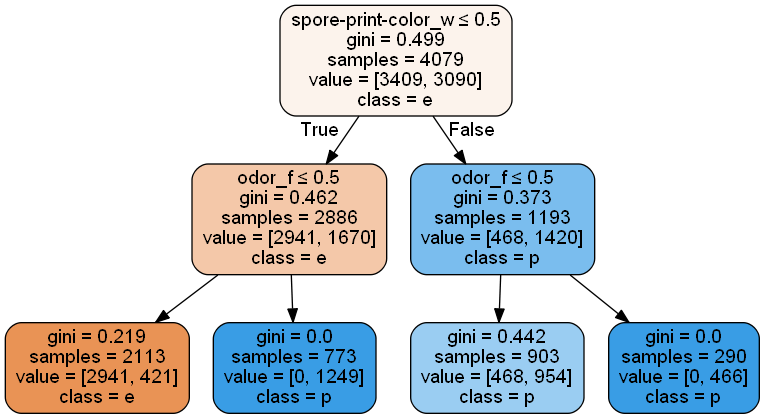

In [48]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=10, max_depth=2, criterion="gini",
                                                 min_samples_leaf=2, min_samples_split=2, random_state=1234)
clf_rf = clf_rf.fit(X_train, y_train)

#学習データによる評価
print(clf_rf)
print()
print("score=", clf_rf.score(X_train, y_train))

# 決定木の描画
for i, est in enumerate(clf_rf.estimators_):
    print(i)
    # 決定木の描画
    dot_data = StringIO() #dotファイル情報の格納先
    export_graphviz(est, out_file=dot_data,  
                         feature_names=X_train.columns,  
                         class_names=["e","p"],  
                         filled=True, rounded=True,  
                         special_characters=True) 
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
    display(Image(graph.create_png()))


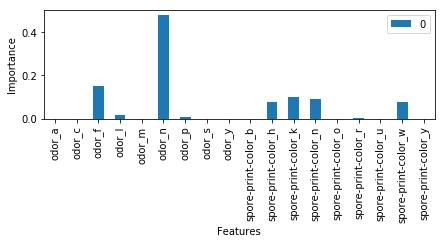

In [49]:
pd.DataFrame(clf_rf.feature_importances_, index=X_train.columns).plot.bar(figsize=(7,2))
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

In [50]:
#テストデータで評価
y_pred_rf = clf_rf.predict(X_test)

#評価結果の表示
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy : 0.9427692307692308
             precision    recall  f1-score   support

          0       0.95      0.94      0.94       843
          1       0.94      0.95      0.94       782

avg / total       0.94      0.94      0.94      1625



決定木、ロジスティック回帰共に98%以上の強識別機が作成できる組み合わせのため、ランダムフォレストをそのまま適用した場合、Accuracyが下がる結果となった。<br>

### アダブースト
アダブーストの適用<br>
説明変数 : odor、spore-print-color<br>
目的変数 : class

In [51]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

clf_ab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3,
                                                min_samples_leaf=2,
                                                min_samples_split=2, 
                                                random_state=1234,
                                                criterion="gini"),
                                           n_estimators=6, random_state=1234)
clf_ab.fit(X_train, y_train)
print(clf_ab)
print()
print("score=", clf_ab.score(X_train, y_train))


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best'),
          learning_rate=1.0, n_estimators=6, random_state=1234)

score= 0.9943068164332974


0


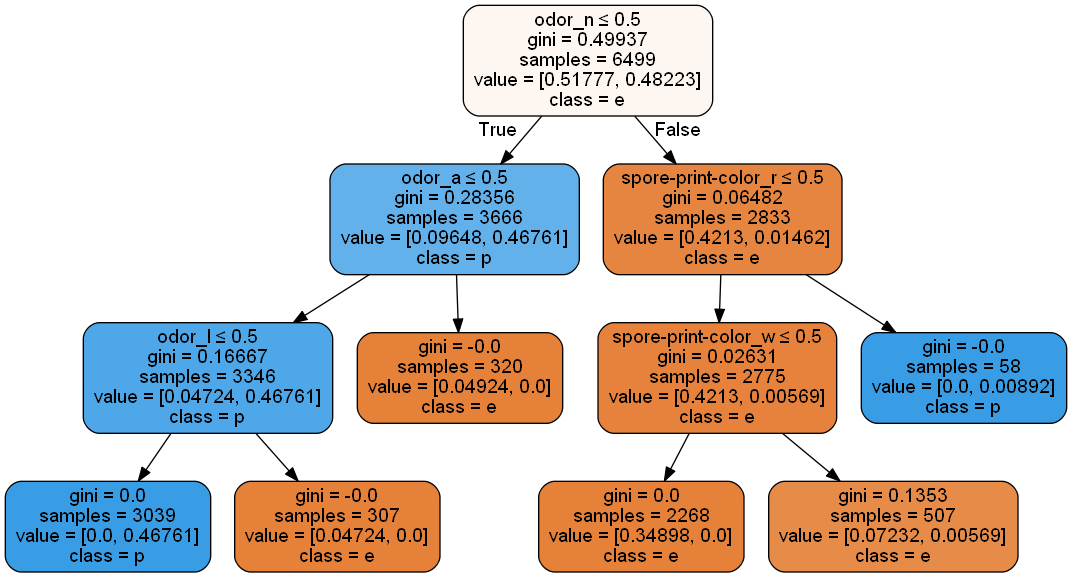

1


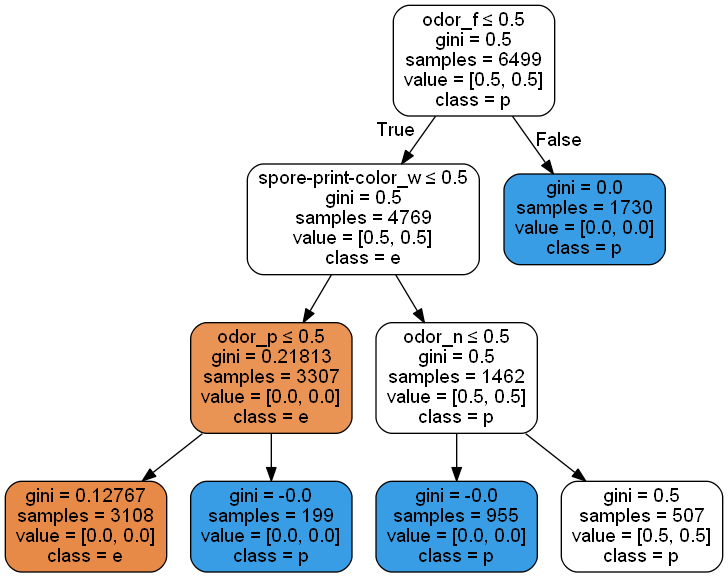

2


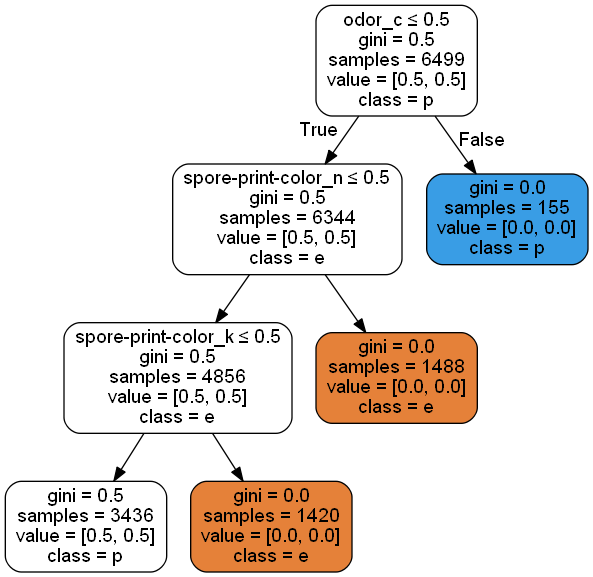

3


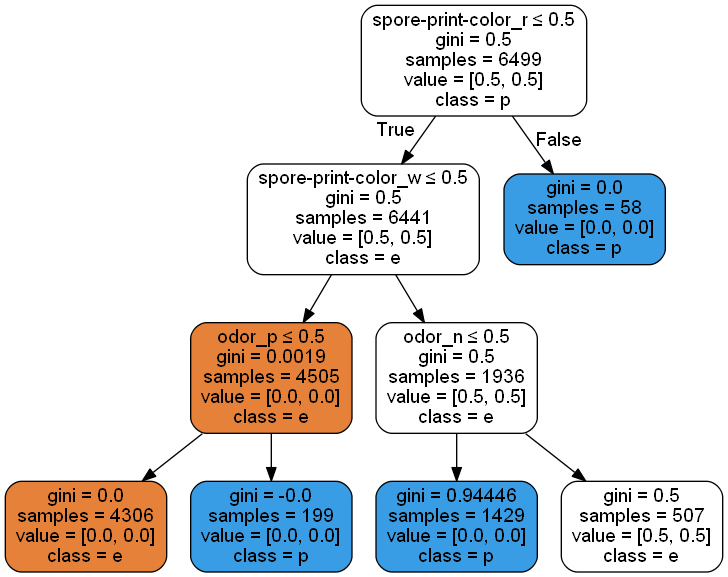

4


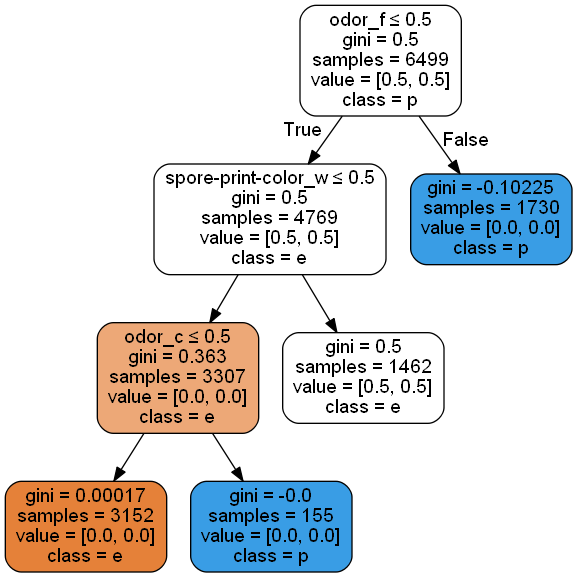

5


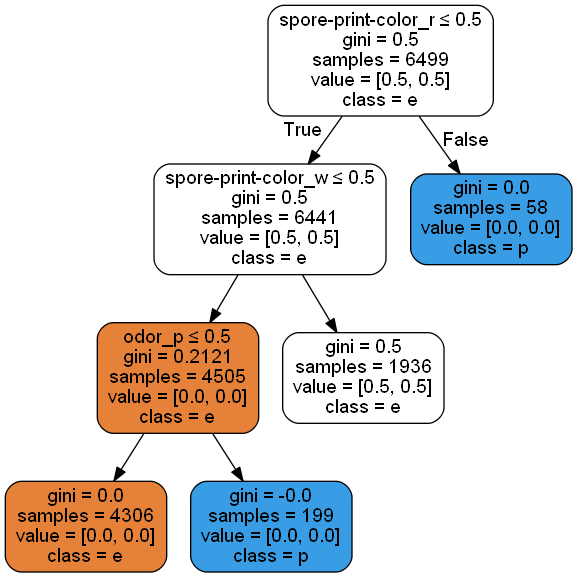

In [52]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO

for i, est in enumerate(clf_ab.estimators_):
    print(i)
    
    # 決定木の描画
    dot_data = StringIO() #dotファイル情報の格納先
    export_graphviz(est, out_file=dot_data,  
                         feature_names=X_train.columns,  
                         class_names=["e","p"],  
                         filled=True, rounded=True,  
                         special_characters=True,precision=5) 
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
    display(Image(graph.create_png()))

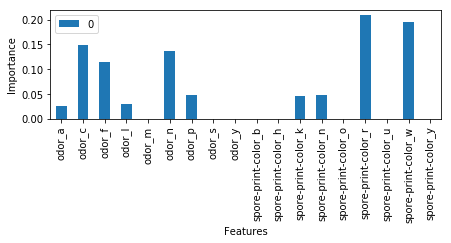

In [53]:
pd.DataFrame(clf_ab.feature_importances_, index=X_train.columns).plot.bar(figsize=(7,2))
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

In [54]:
#テストデータで評価
y_pred_ab = clf_ab.predict(X_test)

#評価結果の表示
print("Accuracy :", accuracy_score(y_test, y_pred_ab))
print(classification_report(y_test, y_pred_ab))

Accuracy : 0.9932307692307693
             precision    recall  f1-score   support

          0       0.99      1.00      0.99       843
          1       1.00      0.99      0.99       782

avg / total       0.99      0.99      0.99      1625



### クロスバリデーション
クロスバリデーションを利用して、利用しなかった結果と比較

In [55]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

#### 決定木
下記のパラメータリストを用いグリッドサーチにより最適なパラメータを見つける<br>
　・criterion　：　gini, entropy<br>
　・max_depth  ：  3, 5, 7<br>
　・min_samples_split　：　2, 3<br>
　・min_samples_leaf　：　2,3<br>

In [56]:
#決定木のパラメータ
param_grid = [
    {'criterion':['gini'], 'max_depth':[3], 'min_samples_split':[2],'min_samples_leaf':[2],'random_state':[1234]},
    {'criterion':['gini'], 'max_depth':[5], 'min_samples_split':[2],'min_samples_leaf':[2],'random_state':[1234]},
    {'criterion':['gini'], 'max_depth':[7], 'min_samples_split':[2],'min_samples_leaf':[2],'random_state':[1234]},
    {'criterion':['gini'], 'max_depth':[3], 'min_samples_split':[3],'min_samples_leaf':[2],'random_state':[1234]},
    {'criterion':['gini'], 'max_depth':[5], 'min_samples_split':[3],'min_samples_leaf':[2],'random_state':[1234]},
    {'criterion':['gini'], 'max_depth':[7], 'min_samples_split':[3],'min_samples_leaf':[2],'random_state':[1234]},
    {'criterion':['gini'], 'max_depth':[3], 'min_samples_split':[2],'min_samples_leaf':[3],'random_state':[1234]},
    {'criterion':['gini'], 'max_depth':[5], 'min_samples_split':[2],'min_samples_leaf':[3],'random_state':[1234]},
    {'criterion':['gini'], 'max_depth':[7], 'min_samples_split':[2],'min_samples_leaf':[3],'random_state':[1234]},
    {'criterion':['gini'], 'max_depth':[3], 'min_samples_split':[3],'min_samples_leaf':[3],'random_state':[1234]},
    {'criterion':['gini'], 'max_depth':[5], 'min_samples_split':[3],'min_samples_leaf':[3],'random_state':[1234]},
    {'criterion':['gini'], 'max_depth':[7], 'min_samples_split':[3],'min_samples_leaf':[3],'random_state':[1234]},
    {'criterion':['entropy'], 'max_depth':[3], 'min_samples_split':[2],'min_samples_leaf':[2],'random_state':[1234]},
    {'criterion':['entropy'], 'max_depth':[5], 'min_samples_split':[2],'min_samples_leaf':[2],'random_state':[1234]},
    {'criterion':['entropy'], 'max_depth':[7], 'min_samples_split':[2],'min_samples_leaf':[2],'random_state':[1234]},
    {'criterion':['entropy'], 'max_depth':[3], 'min_samples_split':[3],'min_samples_leaf':[2],'random_state':[1234]},
    {'criterion':['entropy'], 'max_depth':[5], 'min_samples_split':[3],'min_samples_leaf':[2],'random_state':[1234]},
    {'criterion':['entropy'], 'max_depth':[7], 'min_samples_split':[3],'min_samples_leaf':[2],'random_state':[1234]},
    {'criterion':['entropy'], 'max_depth':[3], 'min_samples_split':[2],'min_samples_leaf':[3],'random_state':[1234]},
    {'criterion':['entropy'], 'max_depth':[5], 'min_samples_split':[2],'min_samples_leaf':[3],'random_state':[1234]},
    {'criterion':['entropy'], 'max_depth':[7], 'min_samples_split':[2],'min_samples_leaf':[3],'random_state':[1234]},
    {'criterion':['entropy'], 'max_depth':[3], 'min_samples_split':[3],'min_samples_leaf':[3],'random_state':[1234]},
    {'criterion':['entropy'], 'max_depth':[5], 'min_samples_split':[3],'min_samples_leaf':[3],'random_state':[1234]},
    {'criterion':['entropy'], 'max_depth':[7], 'min_samples_split':[3],'min_samples_leaf':[3],'random_state':[1234]},
]

#グリッドサーチの実行
cv_dt = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,cv=5)
cv_dt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'criterion': ['gini'], 'max_depth': [3], 'min_samples_split': [2], 'min_samples_leaf': [2], 'random_state': [1234]}, {'criterion': ['gini'], 'max_depth': [5], 'min_samples_split': [2], 'min_samples_leaf': [2], 'random_state': [1234]}, {'criterion': ['gini'], 'max_depth': [7], 'min_sampl...opy'], 'max_depth': [7], 'min_samples_split': [3], 'min_samples_leaf': [3], 'random_state': [1234]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [57]:
#ベストパラメータの表示
cv_dt.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'random_state': 1234}

score= 0.9943068164332974


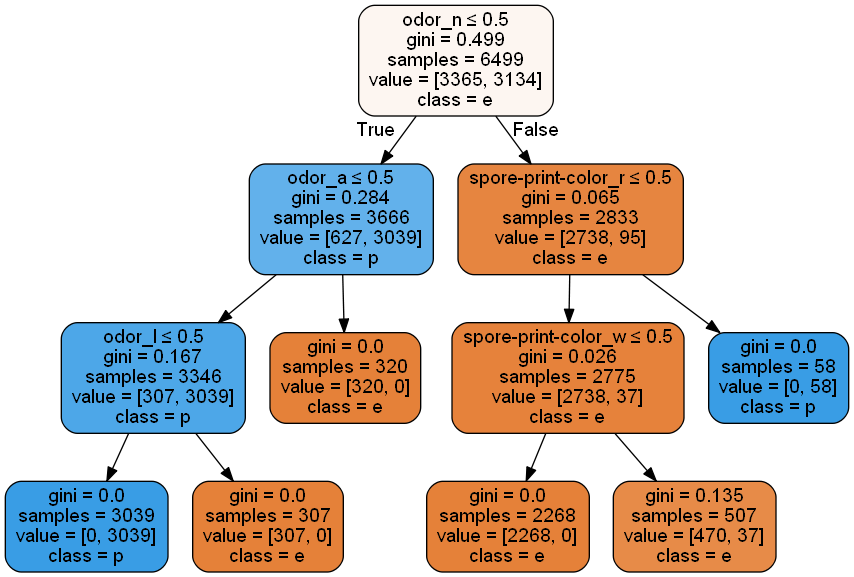

In [58]:
#学習データによる評価
print("score=", cv_dt.best_estimator_.score(X_train, y_train))

# 決定木の描画
dot_data = StringIO() #dotファイル情報の格納先
export_graphviz(cv_dt.best_estimator_, out_file=dot_data,  
                     feature_names=X_train.columns,  
                     class_names=["e","p"],  
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

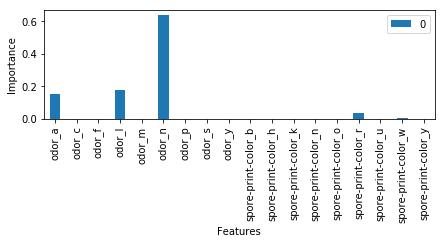

In [59]:
pd.DataFrame(cv_dt.best_estimator_.feature_importances_, index=X_train.columns).plot.bar(figsize=(7,2))
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

In [60]:
#テストデータで評価
y_pred_dt_cv = cv_dt.best_estimator_.predict(X_test)

#評価結果の表示
print("Accuracy :", accuracy_score(y_test, y_pred_dt_cv))
print(classification_report(y_test, y_pred_dt_cv))

Accuracy : 0.9932307692307693
             precision    recall  f1-score   support

          0       0.99      1.00      0.99       843
          1       1.00      0.99      0.99       782

avg / total       0.99      0.99      0.99      1625



#### ランダムフォレスト
最適なn_estimatorsの数をグリッドサーチにより見つける

In [61]:
#パラメータリスト
param_grid_rf = [
    {'n_estimators':[7],'criterion':['gini'], 'max_depth':[2], 'min_samples_split':[2],'min_samples_leaf':[2],'random_state':[1234]},
    {'n_estimators':[8],'criterion':['gini'], 'max_depth':[2], 'min_samples_split':[2],'min_samples_leaf':[2],'random_state':[1234]},
    {'n_estimators':[9],'criterion':['gini'], 'max_depth':[2], 'min_samples_split':[2],'min_samples_leaf':[2],'random_state':[1234]},
    {'n_estimators':[10],'criterion':['gini'], 'max_depth':[2], 'min_samples_split':[2],'min_samples_leaf':[2],'random_state':[1234]},
    {'n_estimators':[11],'criterion':['gini'], 'max_depth':[2], 'min_samples_split':[2],'min_samples_leaf':[2],'random_state':[1234]},
]
#グリッドサーチの実行
cv_rf = GridSearchCV(RandomForestClassifier(),param_grid=param_grid_rf,cv=5)
cv_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [7], 'criterion': ['gini'], 'max_depth': [2], 'min_samples_split': [2], 'min_samples_leaf': [2], 'random_state': [1234]}, {'n_estimators': [8], 'criterion': ['gini'], 'max_depth': [2], 'min_samples_split': [2], 'min_samples_leaf': [2], 'random_state': [1234]}, {'n_estima...ini'], 'max_depth': [2], 'min_samples_split': [2], 'min_samples_leaf': [2], 'random_state': [1234]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='w

In [62]:
#ベストパラメータ
cv_rf.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 8,
 'random_state': 1234}

n_estimators = 8が最適と判断された

score= 0.9429142945068472
0


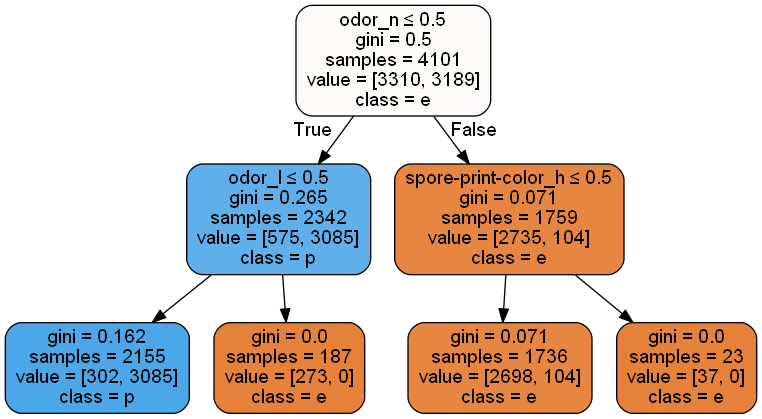

1


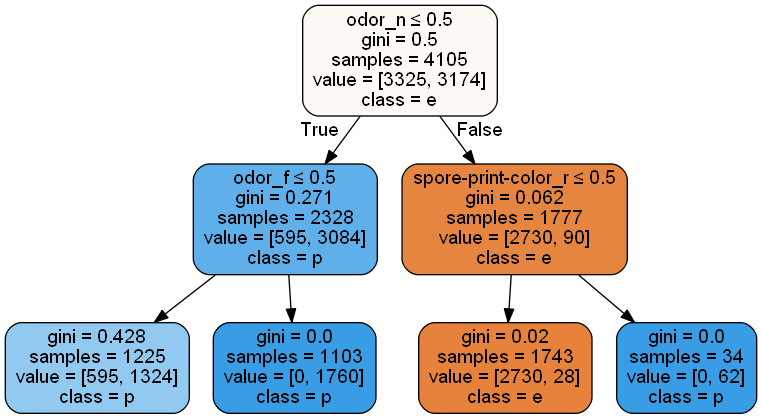

2


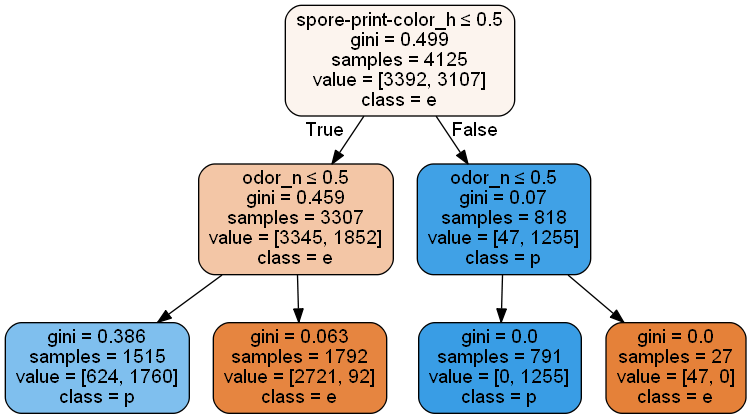

3


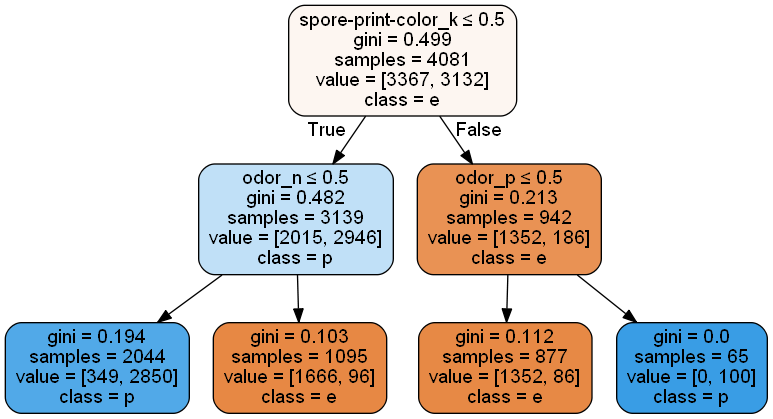

4


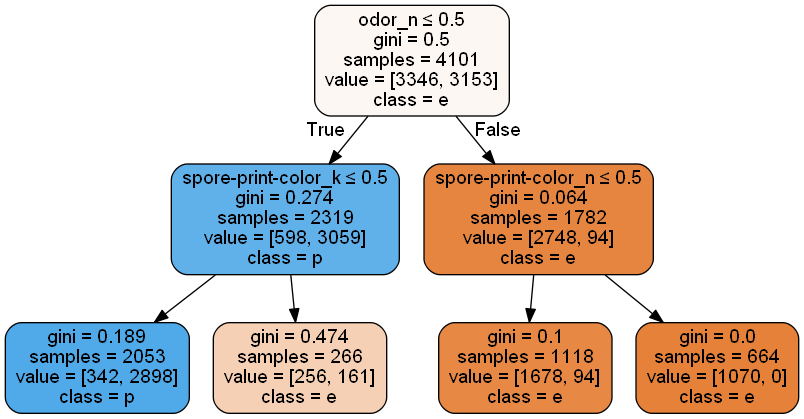

5


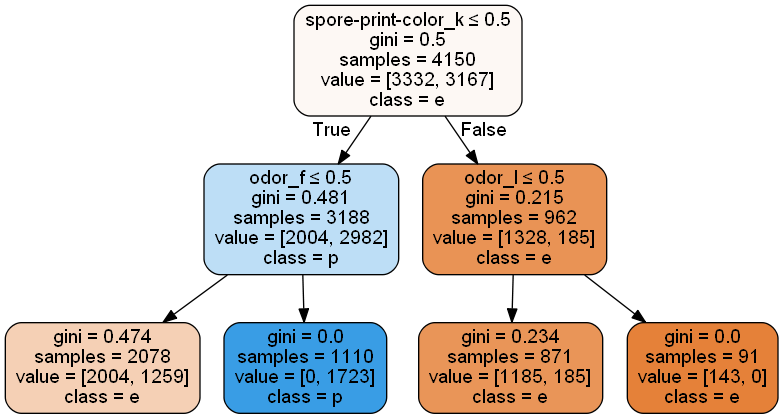

6


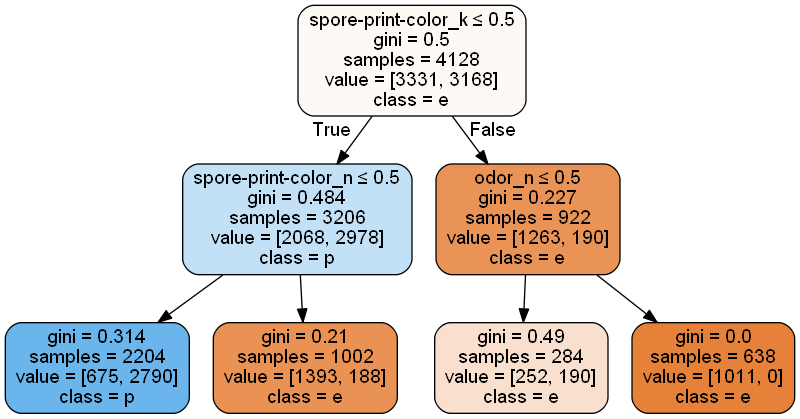

7


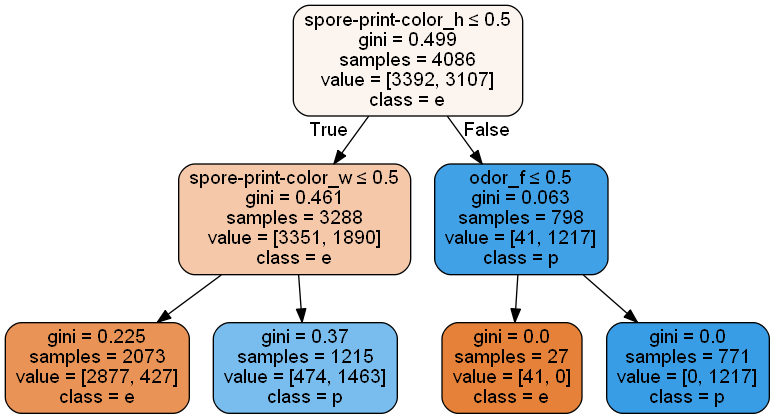

In [63]:
#学習データによる評価
print("score=", cv_rf.best_estimator_.score(X_train, y_train))

# 決定木の描画
for i, est in enumerate(cv_rf.best_estimator_.estimators_):
    print(i)
    # 決定木の描画
    dot_data = StringIO() #dotファイル情報の格納先
    export_graphviz(est, out_file=dot_data,  
                         feature_names=X_train.columns,  
                         class_names=["e","p"],  
                         filled=True, rounded=True,  
                         special_characters=True) 
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
    display(Image(graph.create_png()))

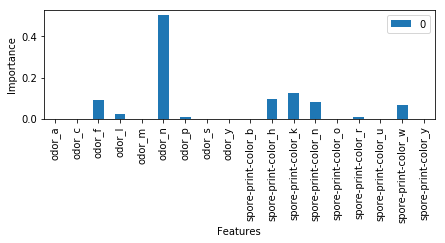

In [64]:
pd.DataFrame(cv_rf.best_estimator_.feature_importances_, index=X_train.columns).plot.bar(figsize=(7,2))
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

In [65]:
#テストデータで評価
y_pred_rf_cv = cv_rf.best_estimator_.predict(X_test)

#評価結果の表示
print("Accuracy :", accuracy_score(y_test, y_pred_rf_cv))
print(classification_report(y_test, y_pred_rf_cv))

Accuracy : 0.9427692307692308
             precision    recall  f1-score   support

          0       0.95      0.94      0.94       843
          1       0.94      0.95      0.94       782

avg / total       0.94      0.94      0.94      1625



#### アダブースト
n_estimatorsを5 - 8、決定木のmax_depthを2 - 4の範囲で最適なパラメータを検索

In [66]:
param_grid_ab =  [
    {'n_estimators':[5],'base_estimator': [DecisionTreeClassifier(max_depth=2,criterion='gini',min_samples_split=2,min_samples_leaf=2, random_state=1234)]},
    {'n_estimators':[5],'base_estimator': [DecisionTreeClassifier(max_depth=3,criterion='gini',min_samples_split=2,min_samples_leaf=2, random_state=1234)]},
    {'n_estimators':[5],'base_estimator': [DecisionTreeClassifier(max_depth=4,criterion='gini',min_samples_split=2,min_samples_leaf=2, random_state=1234)]},
    {'n_estimators':[6],'base_estimator': [DecisionTreeClassifier(max_depth=2,criterion='gini',min_samples_split=2,min_samples_leaf=2, random_state=1234)]},
    {'n_estimators':[6],'base_estimator': [DecisionTreeClassifier(max_depth=3,criterion='gini',min_samples_split=2,min_samples_leaf=2, random_state=1234)]},
    {'n_estimators':[6],'base_estimator': [DecisionTreeClassifier(max_depth=4,criterion='gini',min_samples_split=2,min_samples_leaf=2, random_state=1234)]},
    {'n_estimators':[7],'base_estimator': [DecisionTreeClassifier(max_depth=2,criterion='gini',min_samples_split=2,min_samples_leaf=2, random_state=1234)]},
    {'n_estimators':[7],'base_estimator': [DecisionTreeClassifier(max_depth=3,criterion='gini',min_samples_split=2,min_samples_leaf=2, random_state=1234)]},
    {'n_estimators':[7],'base_estimator': [DecisionTreeClassifier(max_depth=4,criterion='gini',min_samples_split=2,min_samples_leaf=2, random_state=1234)]},
    {'n_estimators':[8],'base_estimator': [DecisionTreeClassifier(max_depth=2,criterion='gini',min_samples_split=2,min_samples_leaf=2, random_state=1234)]},
    {'n_estimators':[8],'base_estimator': [DecisionTreeClassifier(max_depth=3,criterion='gini',min_samples_split=2,min_samples_leaf=2, random_state=1234)]},
    {'n_estimators':[8],'base_estimator': [DecisionTreeClassifier(max_depth=4,criterion='gini',min_samples_split=2,min_samples_leaf=2, random_state=1234)]},
]

cv_ab = GridSearchCV(AdaBoostClassifier(),param_grid=param_grid_ab,cv=5)
cv_ab.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [5], 'base_estimator': [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
     ...     min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [67]:
#ベストパラメータ
cv_ab.best_params_

{'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
             splitter='best'), 'n_estimators': 5}

n_estimators = 5, max_depth = 2が最適と判断された。

score= 0.9943068164332974
0


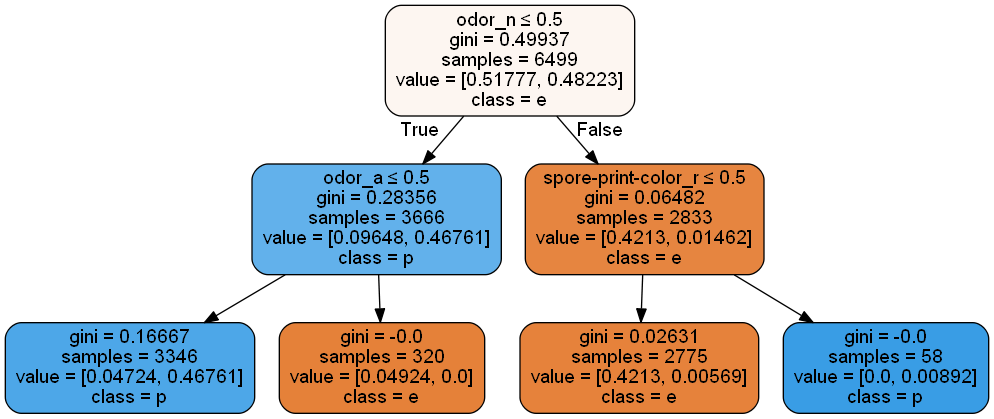

1


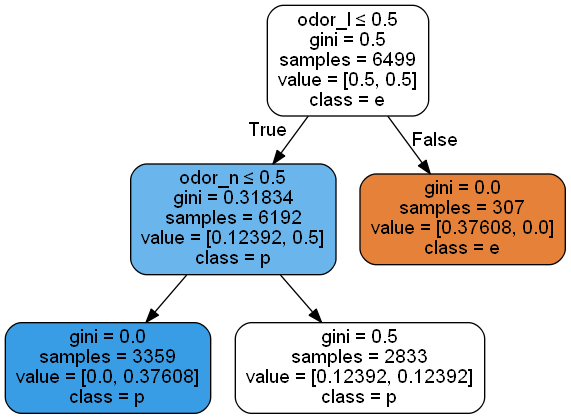

2


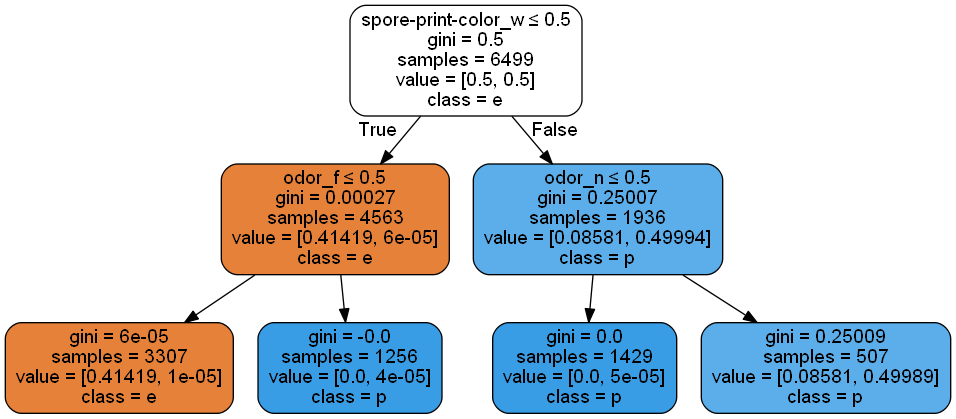

3


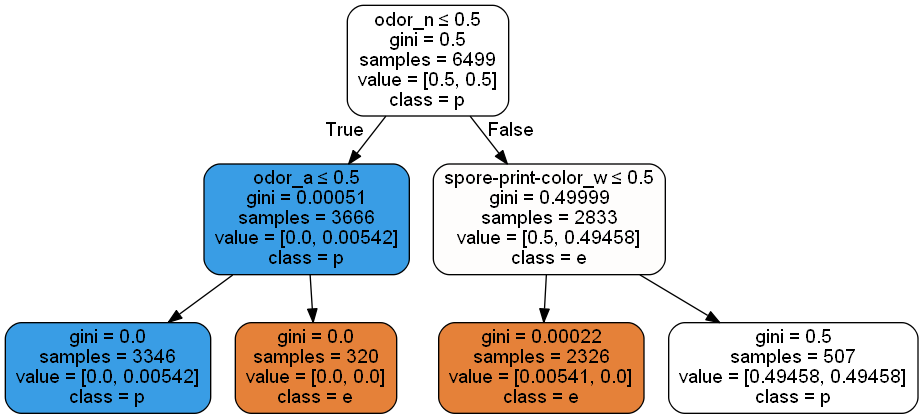

4


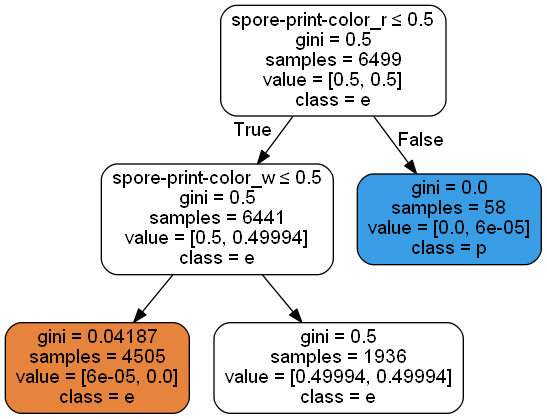

In [68]:
#学習データによる評価
print("score=", cv_ab.best_estimator_.score(X_train, y_train))

# 決定木の描画
for i, est in enumerate(cv_ab.best_estimator_.estimators_):
    print(i)
    
    # 決定木の描画
    dot_data = StringIO() #dotファイル情報の格納先
    export_graphviz(est, out_file=dot_data,  
                         feature_names=X_train.columns,  
                         class_names=["e","p"],  
                         filled=True, rounded=True,  
                         special_characters=True,precision=5) 
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
    display(Image(graph.create_png()))

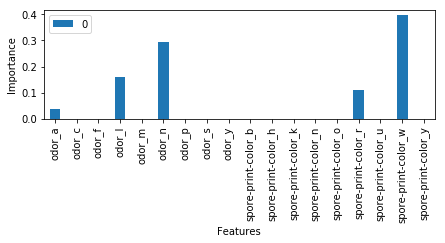

In [69]:
pd.DataFrame(cv_ab.best_estimator_.feature_importances_, index=X_train.columns).plot.bar(figsize=(7,2))
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

In [70]:
#テストデータで評価
y_pred_ab_cv = cv_ab.best_estimator_.predict(X_test)

#評価結果の表示
print("Accuracy :", accuracy_score(y_test, y_pred_ab_cv))
print(classification_report(y_test, y_pred_ab_cv))

Accuracy : 0.9932307692307693
             precision    recall  f1-score   support

          0       0.99      1.00      0.99       843
          1       1.00      0.99      0.99       782

avg / total       0.99      0.99      0.99      1625



### 各結果の比較
#### 決定木
 パラメータの比較<br>
 criterion: gini, max_depth: None, min_samples_leaf: 3, min_samples_split: 2<br>
 criterion: gini, max_depth: 3,    min_samples_leaf: 2, min_samples_split: 2<br>

max_depthはNoneになっているが実際の決定木では深さ3になっているため、同じと考えられる。<br>
min_samples_leafの数が異なるが、実際に導出された決定木は同等のものとなっている。<br>

In [71]:
#評価結果の表示
print("Accuracy     :", accuracy_score(y_test, y_pred_dt))
print("Accuracy(CV) :", accuracy_score(y_test, y_pred_dt_cv))
print(classification_report(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt_cv))

Accuracy     : 0.9932307692307693
Accuracy(CV) : 0.9932307692307693
             precision    recall  f1-score   support

          0       0.99      1.00      0.99       843
          1       1.00      0.99      0.99       782

avg / total       0.99      0.99      0.99      1625

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       843
          1       1.00      0.99      0.99       782

avg / total       0.99      0.99      0.99      1625



同等の木のため、Accuracy、precision、recall等同じ結果になった。

#### ランダムフォレスト
 パラメータの比較<br>
 n_estimators: 10<br>
 n_estimators: 8<br>

 

In [72]:
#評価結果の表示
print("Accuracy     :", accuracy_score(y_test, y_pred_rf))
print("Accuracy(CV) :", accuracy_score(y_test, y_pred_rf_cv))
print(classification_report(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf_cv))

Accuracy     : 0.9427692307692308
Accuracy(CV) : 0.9427692307692308
             precision    recall  f1-score   support

          0       0.95      0.94      0.94       843
          1       0.94      0.95      0.94       782

avg / total       0.94      0.94      0.94      1625

             precision    recall  f1-score   support

          0       0.95      0.94      0.94       843
          1       0.94      0.95      0.94       782

avg / total       0.94      0.94      0.94      1625



同じ結果となった。<br>
説明変数の重要度は異なるため、どうして同じ結果になったかを時間があれば調べる。

#### アダブースト
 パラメータの比較<br>
 n_estimators = 6, max_depth = 3<br>
 n_estimators = 5, max_depth = 2<br>

In [75]:
#評価結果の表示
print("Accuracy     :", accuracy_score(y_test, y_pred_ab))
print("Accuracy(CV) :", accuracy_score(y_test, y_pred_ab_cv))
print(classification_report(y_test, y_pred_ab))
print(classification_report(y_test, y_pred_ab_cv))

Accuracy     : 0.9932307692307693
Accuracy(CV) : 0.9932307692307693
             precision    recall  f1-score   support

          0       0.99      1.00      0.99       843
          1       1.00      0.99      0.99       782

avg / total       0.99      0.99      0.99      1625

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       843
          1       1.00      0.99      0.99       782

avg / total       0.99      0.99      0.99      1625



同じ結果となった。<br>
説明変数の重要度は異なるため、どうして同じ結果になったかを時間があれば調べる。

### 今後の方針
説明変数の取捨選択方法を考えてモデルの精度をあげる